Bu not defteri, hangi özelliklerin Alzheimer ile sağlıklı EEG'yi ayırt ettiğini nasıl belirleyeceğimizi göstermektedir. Önce güç spektrumunu, ardından da çapraz spektral yoğunluğu çiziyoruz.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from model_functions import load_subject, subject_psd
from config import DATA_PATH, PROCESSED_DATA_PATH

Aşağıda tek bir katılımcının güç spektrumunun nasıl çizileceğini gösteriyorum.

In [2]:
# test setini analizden çıkarıyoruz. 
excluded = [4, 6, 8, 20, 33, 49, 53, 63, 66, 71, 72, 82]

In [32]:
# Bu kod, ilgili bant gücü verilerini bir diziye yükler ve saklar.
subject_number = 19 #mmse değeri 14
raw = load_subject(subject_number)
spectrum = subject_psd(raw,seg_length=4)
spectrum_array, freqs = spectrum.get_data(return_freqs=True)
spectrum_array = (10**12)*spectrum_array
ch_names = np.array(raw.info.ch_names)
ch_names = ch_names.reshape(-1,1)

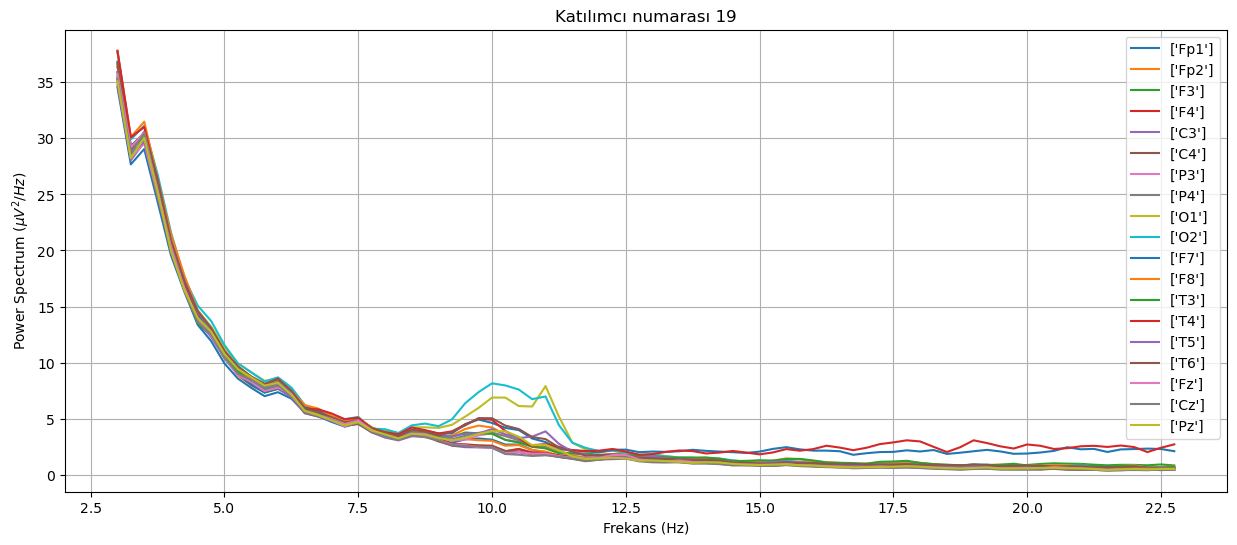

In [33]:
# Bu kod, söz konusu öznenin göreli bant gücünü çizer
plt.figure(figsize = (15,6))
plt.plot(freqs[10:90], np.transpose(spectrum_array)[10:90, :], label = ch_names)
plt.xlabel('Frekans (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title('Katılımcı numarası ' + str(subject_number))
plt.grid()
plt.legend()
plt.show()

In [28]:
subject_number = 54 #mmse değeri 30
raw = load_subject(subject_number)
spectrum = subject_psd(raw,seg_length=4)
spectrum_array, freqs = spectrum.get_data(return_freqs=True)
spectrum_array = (10**12)*spectrum_array
ch_names = np.array(raw.info.ch_names)
ch_names = ch_names.reshape(-1,1)

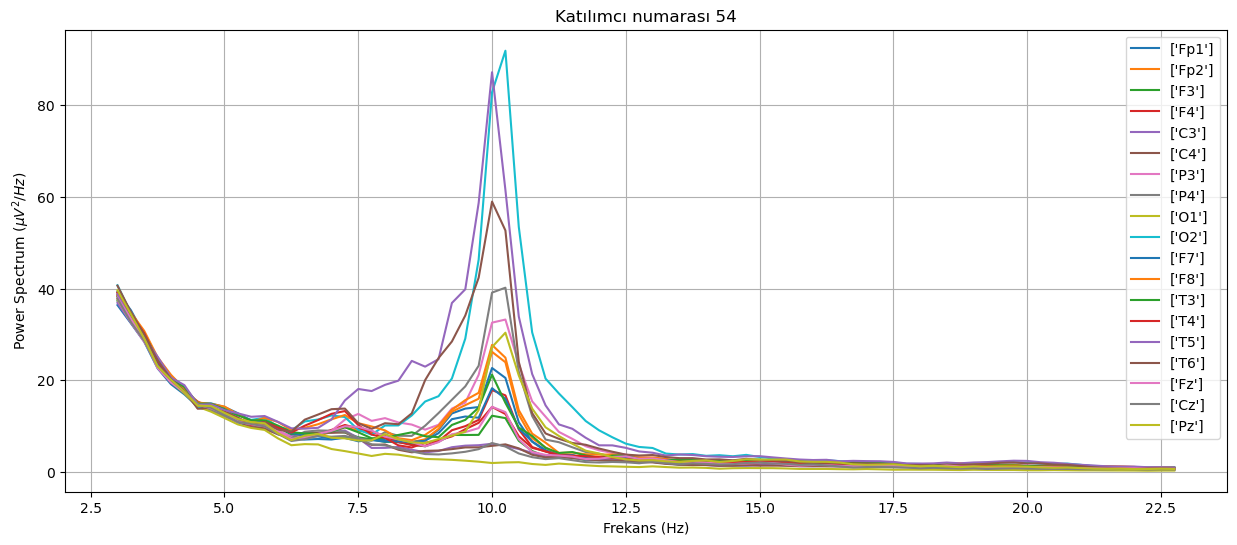

In [29]:
plt.figure(figsize = (15,6))
plt.plot(freqs[10:90], np.transpose(spectrum_array)[10:90, :], label = ch_names)
plt.xlabel('Frekans (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title('Katılımcı numarası ' + str(subject_number))
plt.grid()
plt.legend()
plt.show()

In [38]:
subject_number = 82 #mmse değeri 27
raw = load_subject(subject_number)
spectrum = subject_psd(raw,seg_length=4)
spectrum_array, freqs = spectrum.get_data(return_freqs=True)
spectrum_array = (10**12)*spectrum_array
ch_names = np.array(raw.info.ch_names)
ch_names = ch_names.reshape(-1,1)

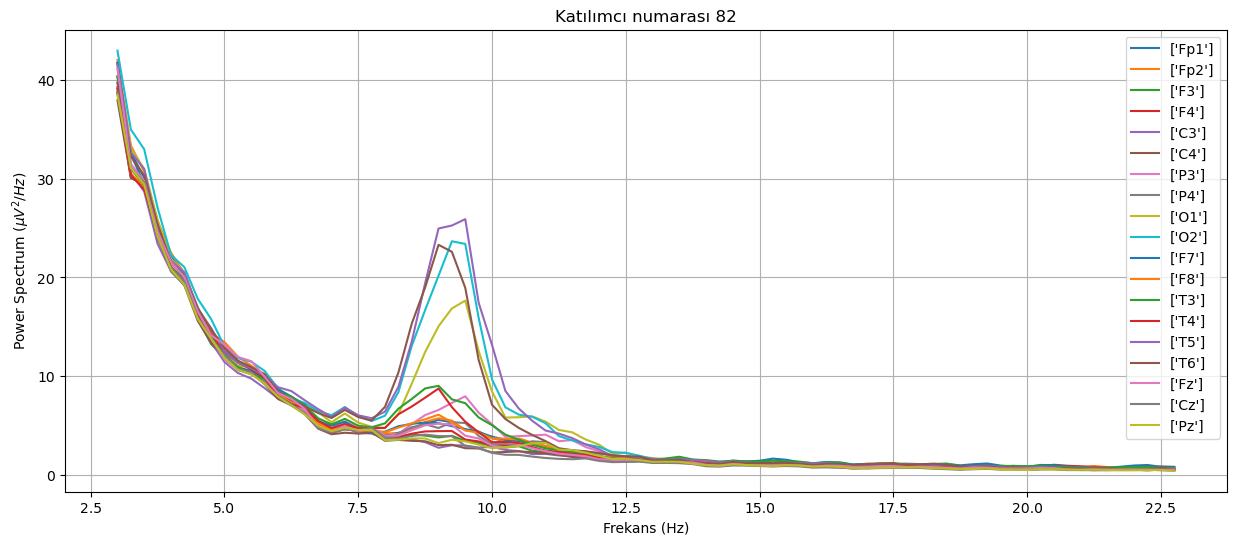

In [39]:
plt.figure(figsize = (15,6))
plt.plot(freqs[10:90], np.transpose(spectrum_array)[10:90, :], label = ch_names)
plt.xlabel('Frekans (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title('Katılımcı numarası ' + str(subject_number))
plt.grid()
plt.legend()
plt.show()

Tüm Alzheimer hastaları, tüm sağlıklı hastaları ve son olarak da frontotemporal demansı olan tüm insanlar için ortalama güç spektrumunu çiziyoruz. Bu, tüm Alzheimer hastalarında ve tüm sağlıklı insanlarda ortaya çıkan ayırt edici özellikleri gerçekten saptadığımızdan emin olmak için yapılır.

## Alzheimer'lı kişilerin Güç Spektrumu

In [58]:
# Bu sadece güç spektrumunu bir dizide saklar
spectrum_array_all = []
for i in range(1,37):#dizide alzheimer başlangıç ve bitiş değerleri
    if i in excluded:
        continue
    raw = load_subject(i)
    spectrum = subject_psd(raw,seg_length=4)
    spectrum_array, freqs = spectrum.get_data(return_freqs=True)
    spectrum_array = (10**12)*spectrum_array
    spectrum_array_all += [spectrum_array]
    

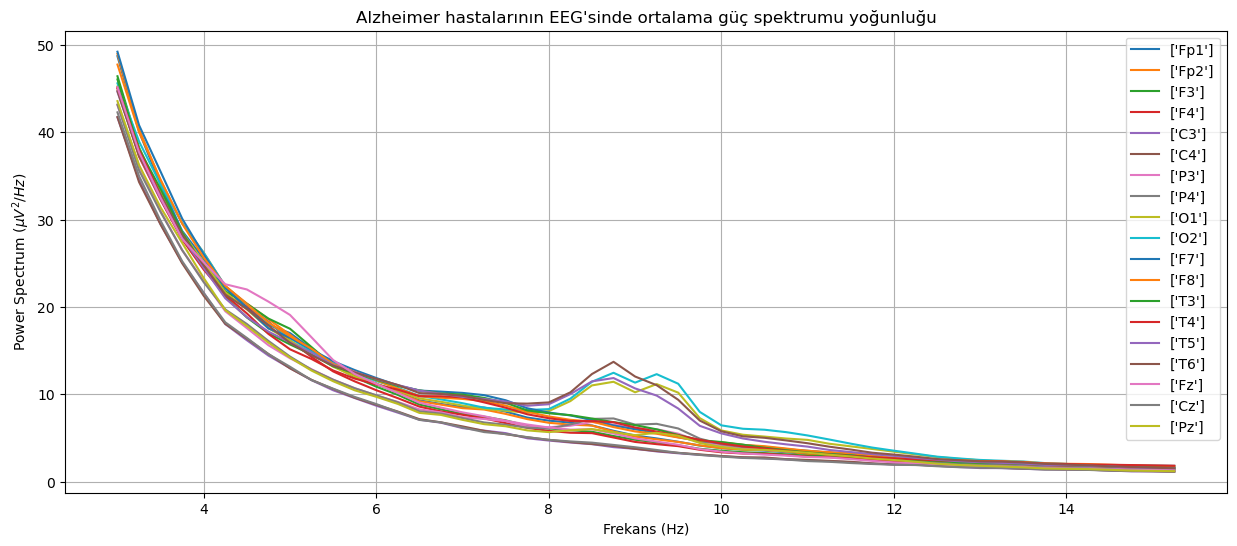

In [60]:
# Bu, ortalama güç spektrumunu çizer.
spectrum_array_avg = np.mean(spectrum_array_all, axis = 0)
plt.figure(figsize = (15,6))
plt.plot(freqs[10:60], np.transpose(spectrum_array_avg)[10:60, :],
        label = ch_names)
plt.xlabel('Frekans (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title("Alzheimer hastalarının EEG'sinde ortalama güç spektrumu yoğunluğu")
plt.grid()
plt.legend()
#plt.savefig('../Figures/Alzheimers_psd.png')
plt.show()


## Sağlıklı insanların Güç Spektrumu 

In [61]:
spectrum_array_all = []
for i in range(37,66):
    if i in excluded:
        continue
    raw = load_subject(i)
    spectrum = subject_psd(raw,seg_length=4)
    spectrum_array, freqs = spectrum.get_data(return_freqs=True)
    spectrum_array = (10**12)*spectrum_array
    spectrum_array_all += [spectrum_array]

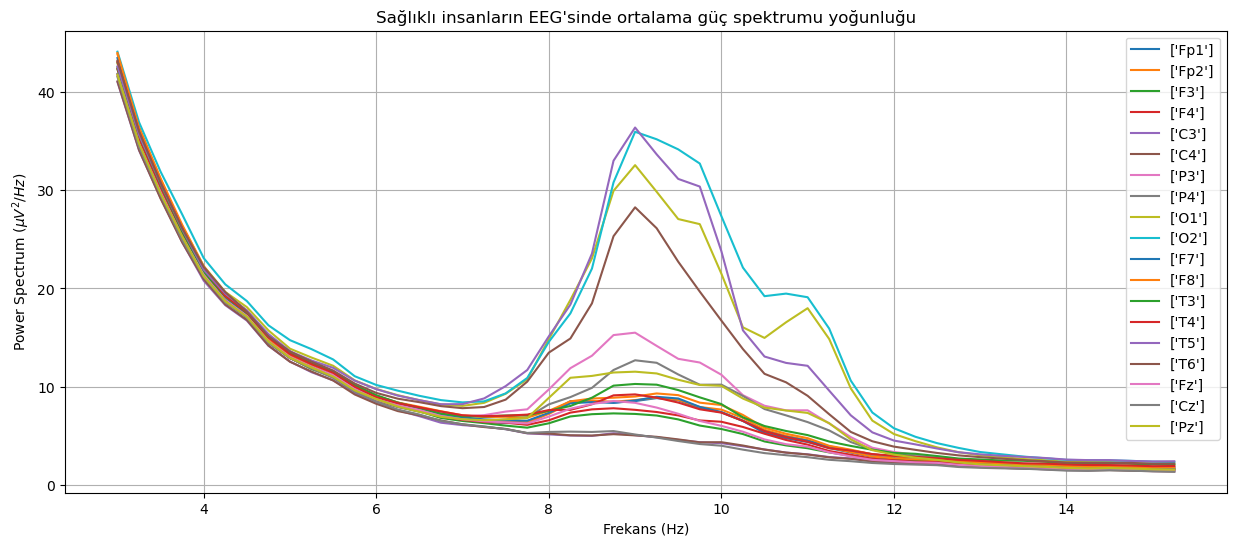

In [62]:
spectrum_array_avg = np.mean(spectrum_array_all, axis = 0)
plt.figure(figsize = (15,6))
plt.plot(freqs[10:60], np.transpose(spectrum_array_avg)[10:60, :],
        label = ch_names)
plt.xlabel('Frekans (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title("Sağlıklı insanların EEG'sinde ortalama güç spektrumu yoğunluğu")
plt.grid()
plt.legend()
#plt.savefig('../Figures/healthy_control_psd.png')
plt.show()


## Frontotemporal demansı olan kişilerin Güç Spektrumu

In [54]:
spectrum_array_all = []
for i in range(66,89):
    if i in excluded:
        continue
    raw = load_subject(i)
    spectrum = subject_psd(raw,seg_length=4)
    spectrum_array, freqs = spectrum.get_data(return_freqs=True)
    spectrum_array = (10**12)*spectrum_array
    spectrum_array_all += [spectrum_array]

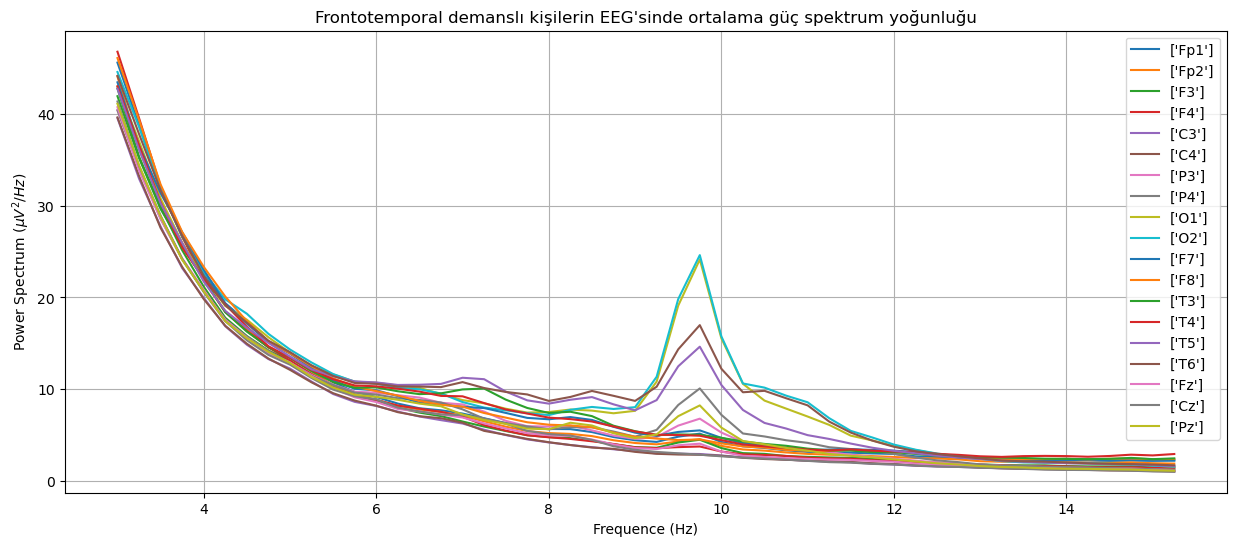

In [55]:
spectrum_array_avg = np.mean(spectrum_array_all, axis = 0)
plt.figure(figsize = (15,6))
plt.plot(freqs[10:60], np.transpose(spectrum_array_avg)[10:60, :],
        label = ch_names)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title("Frontotemporal demanslı kişilerin EEG'sinde ortalama güç spektrum yoğunluğu")
plt.grid()
plt.legend()
#plt.savefig('../Figures/FTD_psd.png')
plt.show()


# Çapraz spektral yoğunluk
Şimdi sağlıklı hastalar ile demans veya Alzheimer hastaları arasında nasıl bir fark olduğunu görmek için farklı kanallar arasındaki çapraz spektral yoğunluğa bakıyoruz.

Computing cross-spectral density from epochs...


C:\Users\A. Aybilge Murat\AppData\Local\Temp\ipykernel_12960\2454328170.py:4: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)


  0%|          | CSD epoch blocks : 0/52 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


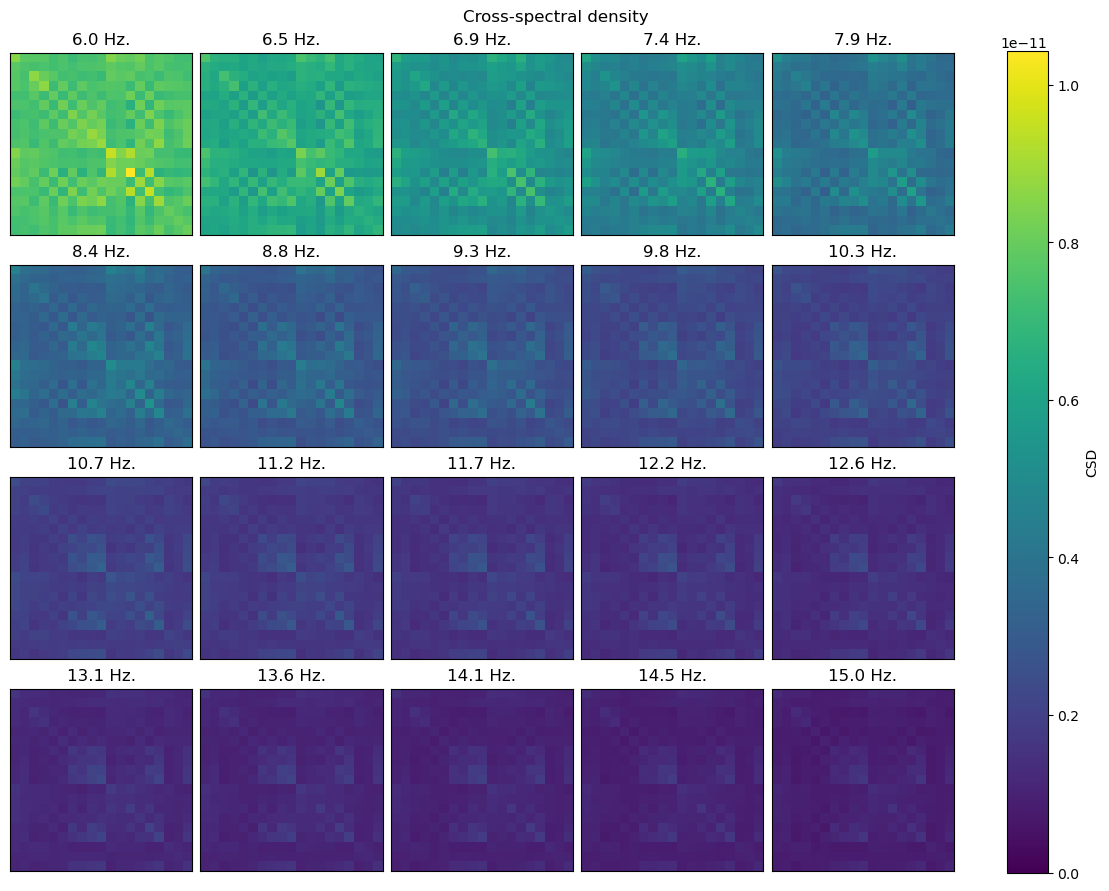

[<Figure size 1100x880 with 21 Axes>]

In [48]:
raw = load_subject(5)
freqs = np.linspace(6,15,20)
epochs = mne.make_fixed_length_epochs(raw,duration=30,preload=True,overlap=15,verbose=False)
csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)
csd_channels.plot()

C:\Users\A. Aybilge Murat\AppData\Local\Temp\ipykernel_12960\2910554725.py:4: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)


Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/52 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


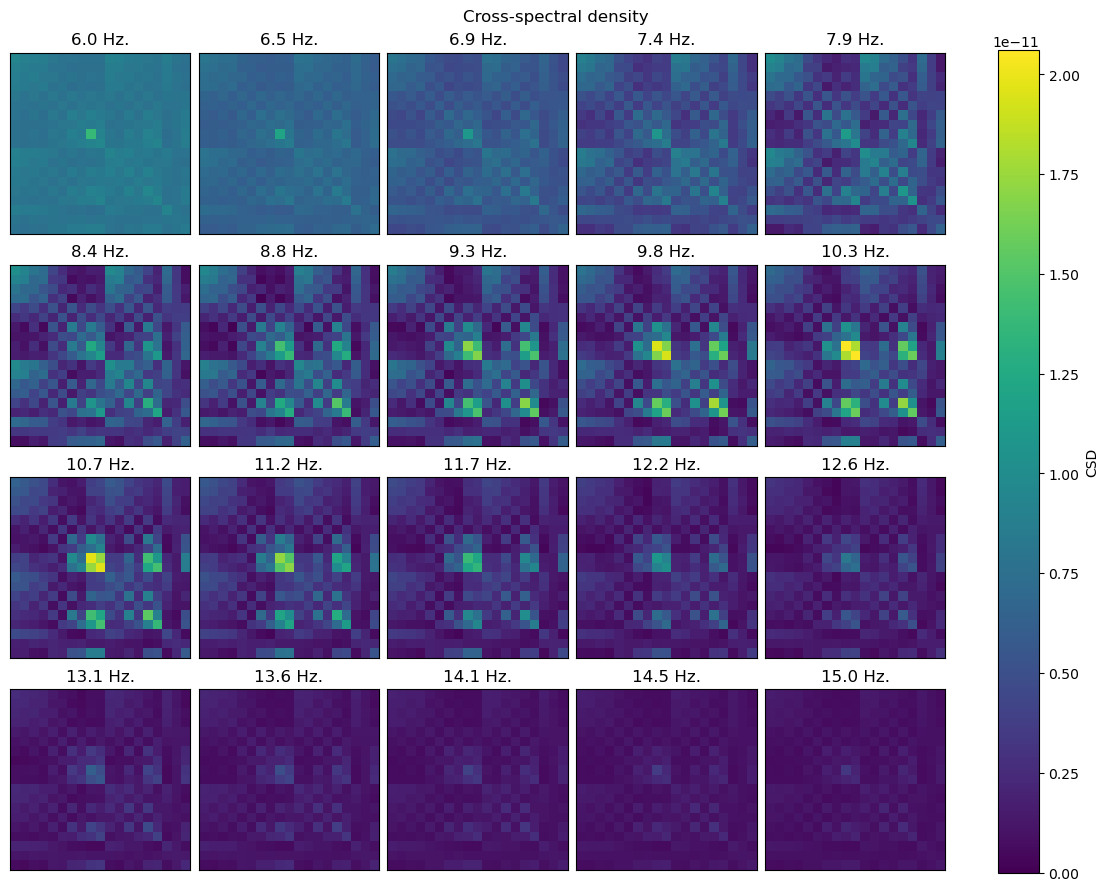

[<Figure size 1100x880 with 21 Axes>]

In [49]:
raw = load_subject(47)
freqs = np.linspace(6,15,20)
epochs = mne.make_fixed_length_epochs(raw,duration=30,preload=True,overlap=15,verbose=False)
csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)
csd_channels.plot()

C:\Users\A. Aybilge Murat\AppData\Local\Temp\ipykernel_12960\770826251.py:4: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)


Computing cross-spectral density from epochs...


  0%|          | CSD epoch blocks : 0/53 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


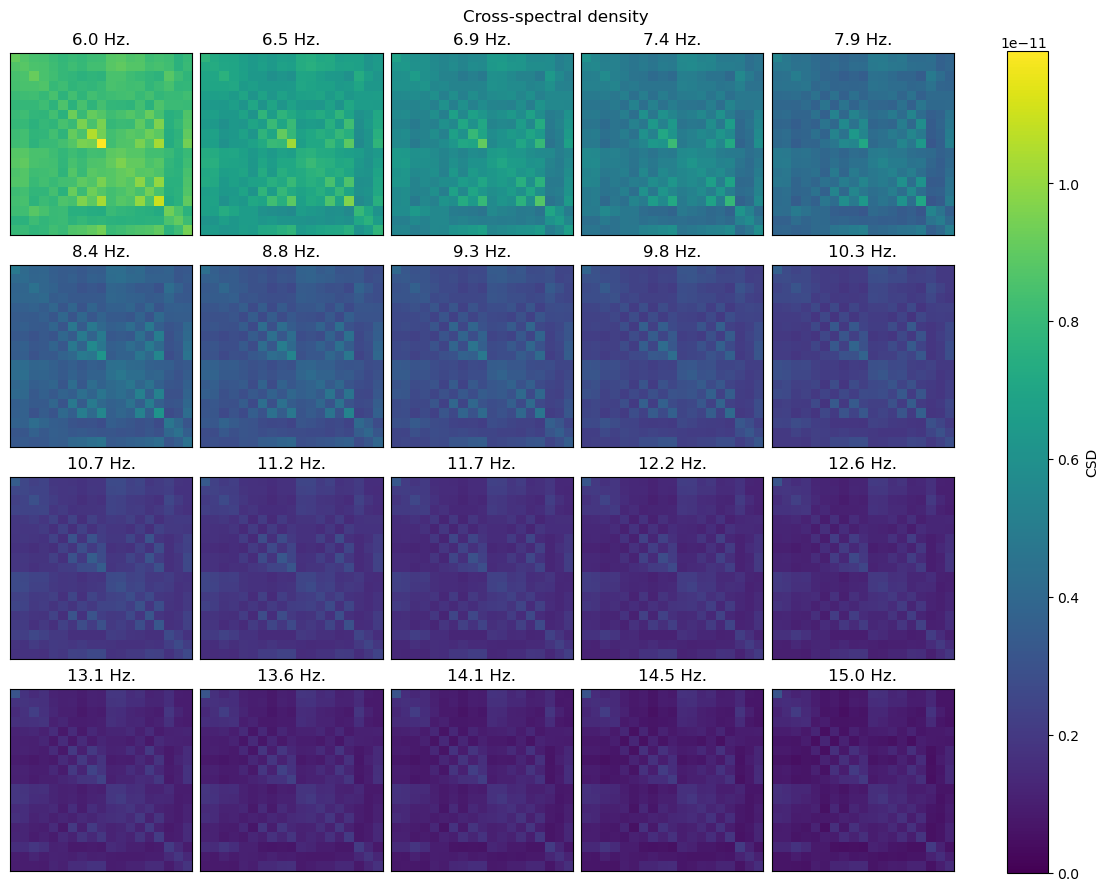

[<Figure size 1100x880 with 21 Axes>]

In [50]:
raw = load_subject(76)
freqs = np.linspace(6,15,20)
epochs = mne.make_fixed_length_epochs(raw,duration=30,preload=True,overlap=15,verbose=False)
csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)
csd_channels.plot()